In [1]:
#Import basic python packages for data analysis and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.lines as mlines
import pylab as plot
import matplotlib
import geopandas as gpd
from shapely.geometry import Point, Polygon
from shapely.ops import nearest_points
import random
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
import math
import time
import mapclassify as mc

### Import Sklearn packages
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, cross_validate, cross_val_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor



### Import Scipy stats packages
from scipy.stats import pearsonr
from scipy.stats import boxcox


# Import statsmodel packages
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices


#Sequential Feature Selector
from mlxtend.feature_selection import SequentialFeatureSelector as SFS



import re


import warnings
warnings.filterwarnings("ignore")

sns.set(style = 'whitegrid')
sns.set_palette('bright')
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Load Dataframes

## <b> <font size = 4> BC and NO2 Datasets - Feature Inputs </b> </font>

In [2]:
BC= pd.read_csv("Data/BC_input_clustered.csv")
NO2 = pd.read_csv("Data/NO2_input_clustered.csv")

In [3]:
#Drop the first column and rename 'BC Value' and 'NO2 Value'
BC.drop(columns = ['Unnamed: 0'], inplace=True)
NO2.drop(columns = ['Unnamed: 0'], inplace=True)

BC.rename(columns = {'BC Value': 'BC_Value'}, inplace = True)
NO2.rename(columns = {'NO2 Value': 'NO2_Value'}, inplace = True)

In [4]:
BC.head()

,BC_Value,high-AsphaltPlant-10510811_dist,high-AsphaltPlant-808611_dist,high-AutoRepair-138911_dist,high-AutoRepair-15714511_dist,high-ConcretePlant-10518911_dist,high-ConcretePlant-193511_dist,high-ConcretePlant-477811_dist,high-EGen-10707511_dist,high-EGen-136511_dist,high-EGen-772011_dist,high-Eateries-375111_dist,high-Eateries-771711_dist,high-FoodPlant-14318611_dist,high-FoodPlant-15713811_dist,high-FoodPlant-15756011_dist,high-FoodPlant-340611_dist,high-FoodPlant-343011_dist,high-FoodPlant-512911_dist,high-FoodPlant-808811_dist,high-Foundaries-10457711_dist,high-Foundaries-382111_dist,high-Foundaries-3963311_dist,high-Foundaries-405311_dist,high-Manufacturing-10457411_dist,high-Manufacturing-10476711_dist,high-Manufacturing-10708111_dist,high-Manufacturing-13801611_dist,high-Manufacturing-140211_dist,high-Manufacturing-14267411_dist,high-Manufacturing-380611_dist,high-Manufacturing-3963411_dist,high-Manufacturing-445511_dist,high-Manufacturing-515411_dist,high-Misc-18134411_dist,high-Misc-382911_dist,high-Retail-Res-10460511_dist,high-Retail-Res-10469511_dist,high-Retail-Res-10517111_dist,high-Retail-Res-1106211_dist,high-Retail-Res-137211_dist,high-Retail-Res-13761011_dist,high-Retail-Res-14122011_dist,high-Retail-Res-141411_dist,high-Retail-Res-14241511_dist,high-Retail-Res-14292411_dist,high-Retail-Res-15745711_dist,high-Retail-Res-15941111_dist,high-Retail-Res-17244511_dist,high-Retail-Res-18492711_dist,high-Retail-Res-203711_dist,high-Retail-Res-310211_dist,high-Retail-Res-310411_dist,high-Retail-Res-338911_dist,high-Retail-Res-448011_dist,high-Retail-Res-450311_dist,high-Transportation-18135311_dist,high-Transportation-444911_dist,high-WWTP-379511_dist,high-Waste-10708011_dist,high-Waste-168411_dist,high-Waste-18782611_dist,Precip,Radiation,Maxtemp,Mintemp,Pressure,Dist,number_intersections
0,0.818032,6.260157,4.498548,5.055463,11.180984,2.040220,5.345121,5.010194,5.577767,2.203323,2.459386,4.257761,7.073346,6.846074,8.275590,11.553851,12.208155,1.688757,9.219300,3.103170,10.131771,8.144133,4.772317,4.855038,3.833478,5.177325,11.640505,2.078224,6.778812,8.457198,7.471130,9.341895,10.445208,1.950165,5.254647,8.174086,3.600953,1.896254,5.466311,2.635694,3.389903,2.248262,7.537415,9.818741,2.825993,2.666421,3.665912,3.169434,10.531962,3.268653,5.063293,5.101844,6.113825,4.822267,6.252394,12.703707,0.808483,8.885505,1.923097,9.620051,1.688576,7.050727,1.650273,341.831694,20.744536,11.528689,922.076503,7.310329,3
1,0.551475,6.225561,4.536862,5.094900,11.142577,2.038467,5.311619,5.049036,5.602305,2.164149,2.438376,4.295196,7.038703,6.802082,8.241968,11.513420,12.170377,1.663445,9.180034,3.075784,10.091528,8.109038,4.811767,4.894845,3.868312,5.144002,11.602024,2.089358,6.745859,8.422646,7.431800,9.302295,10.404810,1.917977,5.295085,8.145796,3.612502,1.884551,5.493914,2.610019,3.386504,2.261906,7.512788,9.783986,2.805785,2.649914,3.651422,3.157078,10.492030,3.244833,5.102617,5.081015,6.072113,4.840239,6.276831,12.668309,0.833099,8.845215,1.941628,9.579673,1.688513,7.017086,1.650273,341.831694,20.744536,11.528689,922.076503,7.274900,3
2,0.593712,6.234118,4.518656,5.076528,11.153298,2.032285,5.319585,5.030749,5.587334,2.175306,2.440217,4.277135,7.047287,6.816590,8.250007,11.525389,12.180728,1.667244,9.191273,3.080629,10.103376,8.117870,4.793393,4.876424,3.850748,5.151872,11.612790,2.078529,6.753539,8.431184,7.443076,9.313739,10.416757,1.925208,5.276587,8.151116,3.601578,1.882327,5.478097,2.614031,3.381005,2.250246,7.516351,9.792636,2.807275,2.649767,3.650432,3.155178,10.503682,3.247985,5.084261,5.082819,6.084924,4.827232,6.261891,12.677313,0.817945,8.857092,1.928387,9.591607,1.681664,7.025132,1.650273,341.831694,20.744536,11.528689,922.076503,7.283908,3
3,0.489898,6.216077,4.554789,5.113038,11.130989,2.043743,5.302716,5.067063,5.616603,2.152221,2.435573,4.312942,7.029188,6.786923,8.232977,11.500640,12.159142,1.658762,9.167954,3.069979,10.078866,8.099277,4.829908,4.913050,3.885473,5.135194,11.590391,2.099374,6.737222,8.413170

## <b> <font size = 4> EDF Monitoring Data </b> </font>

In [5]:
df = pd.read_csv('EDF_Data.csv', header = 1)
df['TimePeriod'] = 'Jun2015-May2016'
df.tail()

,Longitude,Latitude,NO Value,NO2 Value,BC Value,TimePeriod
21483,-122.034943,37.560076,129.999995,44.778220,3.923761,Jun2015-May2016
21484,-122.034724,37.560164,60.799998,39.027545,1.408693,Jun2015-May2016
21485,-122.034681,37.559830,34.622951,28.816797,2.659885,Jun2015-May2016
21486,-122.034504,37.559958,74.764705,35.735434,1.776353,Jun2015-May2016
21487,-122.034503,37.559957,78.754782,41.062757,2.014664,Jun2015-May2016


In [6]:
BC_df = df[['Longitude', 'Latitude', 'BC Value', 'TimePeriod']]

In [7]:
NO2_df = df[['Longitude', 'Latitude', 'NO2 Value', 'TimePeriod']]

## <b> <font size = 4> Filter BC and NO2 dataset for points in Oakland </b> </font>

In [8]:
BC_df_Oakland = BC_df[(BC_df['Latitude'] > 37.78) & (BC_df['Latitude'] < 37.87)]

In [9]:
BC_df_Oakland = BC_df_Oakland[(BC_df_Oakland['Longitude'] > -122.33) & (BC_df['Longitude'] < -122.25)]

In [10]:
NO2_df_Oakland = NO2_df[(NO2_df['Latitude'] > 37.78) & (NO2_df['Latitude'] < 37.87)]

In [11]:
NO2_df_Oakland = NO2_df_Oakland[(NO2_df_Oakland['Longitude'] > -122.33) & (NO2_df['Longitude'] < -122.25)]

## <b> <font size = 4> BC Dataset - Feature Importance for facilities with high emissions </b> </font>

In [12]:
BC_feature_importance = pd.read_csv("Data/BC_feature_importance.csv")

In [13]:
BC_feature_importance.drop(columns = ['Unnamed: 0'], inplace=True)
BC_feature_importance_filter = BC_feature_importance[BC_feature_importance['EIS'].notnull()] 
BC_feature_importance_filter.head(50)

,feature,count,mean,std,min,25%,50%,75%,max,grouping,EIS,Latitude,Longitude
0,high-Manufacturing-140211_dist,4,0.083847,0.086814,0.033671,0.035768,0.044097,0.092176,0.213523,Manufacturing,140211.0,37.763634,-122.211018
1,high-EGen-10707511_dist,4,0.072565,0.116021,0.000611,0.010534,0.021999,0.084030,0.245650,EGen,10707511.0,37.869920,-122.258800
2,high-Waste-18782611_dist,4,0.065208,0.084753,0.010612,0.016934,0.029631,0.077905,0.190956,Waste,18782611.0,37.759959,-122.207782
3,high-Retail-Res-14292411_dist,4,0.064716,0.107003,0.001879,0.011167,0.016046,0.069595,0.224892,Retail,14292411.0,37.805546,-122.273745
4,high-Transportation-18135311_dist,4,0.061211,0.105298,0.004499,0.005267,0.010688,0.066632,0.218970,Transportation,18135311.0,37.815798,-122.313141
5,high-Transportation-444911_dist,4,0.046132,0.058479,0.009037,0.015714,0.021069,0.051488,0.133353,Transportation,444911.0,37.722040,-122.200100
6,high-Foundaries-405311_dist,4,0.037324,0.043119,0.014356,0.015330,0.016482,0.038476,0.101978,Foundaries,405311.0,37.875770,-122.305420
7,high-AutoRepair-138911_dist,4,0.036431,0.030203,0.011472,0.012301,0.030061,0.054190,0.074130,AutoRepair,138911.0,37.878390,-122.303300
8,high-FoodPlant-512911_dist,4,0.030826,0.035537,0.006799,0.011330,0.016504,0.036000,0.083498,FoodPlant,512911.0,37.723300,-122.190790
9,high-FoodPlant-808811_dist,4,0.030433,0.037437,0.006389,0.006552,0.015024,0.038905,0.085294,FoodPlant,808811.0,37.793550,-122.268240


## <b> <font size = 4> NO2 Dataset - Feature Importance for facilities with high emissions </b> </font>

In [14]:
NO2_feature_importance = pd.read_csv("Data/NO2_feature_importance.csv")

In [15]:
NO2_feature_importance.drop(columns = ['Unnamed: 0'], inplace=True)
NO2_feature_importance_filter = NO2_feature_importance[NO2_feature_importance['EIS'].notnull()] 
NO2_feature_importance_filter.head(50)

,feature,count,mean,std,min,25%,50%,75%,max,grouping,EIS,Latitude,Longitude
0,high-Retail-Res-18697211_dist,4,0.171022,0.149885,0.005712,0.071910,0.168683,0.267794,0.341011,Retail,18697211.0,37.797402,-122.262048
1,high-Retail-Res-15745711_dist,4,0.125394,0.200420,0.006005,0.006950,0.036204,0.154649,0.423163,Retail,15745711.0,37.807649,-122.255408
2,high-AutoRepair-195711_dist,4,0.081582,0.070933,0.018531,0.021012,0.081260,0.141830,0.145277,AutoRepair,195711.0,37.856380,-122.291490
4,high-FoodPlant-14318611_dist,4,0.058347,0.108597,0.002014,0.004223,0.005073,0.059197,0.221227,FoodPlant,14318611.0,37.727980,-122.246483
5,high-Manufacturing-14071611_dist,4,0.056006,0.079664,0.001614,0.012459,0.024200,0.067747,0.174012,Manufacturing,14071611.0,37.710605,-122.189250
6,high-Retail-Res-18133511_dist,4,0.041533,0.024396,0.007302,0.033933,0.047468,0.055067,0.063892,Retail,18133511.0,37.819224,-122.224353
7,high-WWTP-203811_dist,4,0.028998,0.024109,0.001636,0.020424,0.026975,0.035549,0.060409,WWTP,203811.0,37.712580,-122.190650
8,high-Foundaries-405311_dist,4,0.025840,0.041260,0.004292,0.004503,0.005681,0.027019,0.087707,Foundaries,405311.0,37.860749,-122.279763
9,high-Retail-Res-13761011_dist,4,0.024644,0.025133,0.002935,0.013456,0.017353,0.028542,0.060936,Retail,13761011.0,37.825995,-122.289321
10,high-Misc-382911_dist,4,0.019387,0.014452,0.003959,0.011271,0.017738,0.025853,0.038112,Misc,382911.0,37.769540,-122.180410


## <b> <font size = 4> BC Dataset - Feature Importance for all facilities </b> </font>

In [16]:
BC_feature_importance_all = pd.read_csv("Data/BC_feature_importance_All_Facilities.csv")

In [17]:
BC_feature_importance_all.head()

,Unnamed: 0,feature,count,mean,std,min,25%,50%,75%,max,grouping,EIS,Latitude,Longitude
0,96,13761511-Transportation-medium_dist,4,0.084706,0.133708,0.003013,0.004505,0.026484,0.106685,0.282841,Transportation,13761511,37.721200,-122.222300
1,273,18541311-Retail-Res-medium_dist,4,0.068587,0.109462,0.008055,0.009006,0.016950,0.076531,0.232393,Retail,18541311,37.712297,-122.140379
2,7,10457711-Foundaries-high_dist,4,0.060878,0.117725,0.000088,0.001013,0.002991,0.062857,0.237442,Foundaries,10457711,37.710390,-122.182670
3,224,18128911-Retail-Res-high_dist,4,0.041427,0.066879,0.000523,0.002903,0.012158,0.050683,0.140870,Retail,18128911,37.881117,-122.298131
4,188,15943911-Retail-Res-low_dist,4,0.034597,0.066393,0.001163,0.001360,0.001519,0.034755,0.134186,Retail,15943911,37.816104,-122.262431


In [18]:
BC_feature_importance_all.drop(columns = ['Unnamed: 0'], inplace=True)
BC_feature_importance_all_filter = BC_feature_importance_all[BC_feature_importance_all['Latitude'].notnull()] 
BC_feature_importance_all_filter.head(50)

,feature,count,mean,std,min,25%,50%,75%,max,grouping,EIS,Latitude,Longitude
0,13761511-Transportation-medium_dist,4,0.084706,0.133708,0.003013,0.004505,0.026484,0.106685,0.282841,Transportation,13761511,37.721200,-122.222300
1,18541311-Retail-Res-medium_dist,4,0.068587,0.109462,0.008055,0.009006,0.016950,0.076531,0.232393,Retail,18541311,37.712297,-122.140379
2,10457711-Foundaries-high_dist,4,0.060878,0.117725,0.000088,0.001013,0.002991,0.062857,0.237442,Foundaries,10457711,37.710390,-122.182670
3,18128911-Retail-Res-high_dist,4,0.041427,0.066879,0.000523,0.002903,0.012158,0.050683,0.140870,Retail,18128911,37.881117,-122.298131
4,15943911-Retail-Res-low_dist,4,0.034597,0.066393,0.001163,0.001360,0.001519,0.034755,0.134186,Retail,15943911,37.816104,-122.262431
5,17252511-Retail-Res-medium_dist,4,0.034225,0.028541,0.004596,0.015239,0.031528,0.050515,0.069248,Retail,17252511,37.750110,-122.188261
6,10497711-Retail-Res-medium_dist,4,0.027201,0.052109,0.000694,0.001103,0.001374,0.027472,0.105364,Retail,10497711,37.807760,-122.266980
7,382911-Misc-high_dist,4,0.019072,0.024612,0.002753,0.006063,0.008935,0.021943,0.055666,Misc,382911,37.769540,-122.180410
8,10453011-WWTP-medium_dist,4,0.018370,0.025027,0.005066,0.005692,0.006257,0.018934,0.055898,WWTP,10453011,37.758670,-122.213900
9,14271411-Retail-Res-medium_dist,4,0.018016,0.007776,0.011031,0.011598,0.017306,0.023724,0.026422,Retail,14271411,37.793635,-122.261248


## <b> <font size = 4> NO2 Dataset - Feature Importance for all facilities </b> </font>

In [19]:
NO2_feature_importance_all = pd.read_csv("Data/NO2_feature_importance_All_Facilities.csv")

In [20]:
NO2_feature_importance_all.drop(columns = ['Unnamed: 0'], inplace=True)
NO2_feature_importance_all_filter = NO2_feature_importance_all[NO2_feature_importance_all['Latitude'].notnull()] 
NO2_feature_importance_all_filter.head(50)

,feature,count,mean,std,min,25%,50%,75%,max,grouping,EIS,Latitude,Longitude
0,17252711-Retail-Res-medium_dist,4,0.126919,0.242888,0.002301,0.004170,0.007074,0.129822,0.491225,Retail,17252711,37.791483,-122.270045
1,13761511-Transportation-medium_dist,4,0.112590,0.219664,0.002015,0.002559,0.003130,0.113160,0.442085,Transportation,13761511,37.721200,-122.222300
2,15721111-Retail-Res-high_dist,4,0.080170,0.155406,0.001091,0.002055,0.003159,0.081274,0.313273,Retail,15721111,37.716568,-122.131500
3,10461711-Retail-Res-medium_dist,4,0.053759,0.106811,0.000103,0.000291,0.000479,0.053948,0.213976,Retail,10461711,37.799150,-122.283140
4,15723511-Retail-Res-low_dist,4,0.038678,0.070137,0.000882,0.003427,0.004995,0.040247,0.143840,Retail,15723511,37.755600,-122.253890
5,14241511-Retail-Res-high_dist,4,0.038585,0.040002,0.001188,0.012530,0.030505,0.056560,0.092142,Retail,14241511,37.801940,-122.271160
6,400211-Retail-Res-high_dist,4,0.030945,0.032721,0.001746,0.004037,0.027460,0.054369,0.067113,Retail,400211,37.817850,-122.264010
7,194911-Retail-Res-low_dist,4,0.023903,0.034651,0.001893,0.002494,0.009382,0.030791,0.074956,Retail,194911,37.758710,-122.204400
8,15746511-Retail-Res-low_dist,4,0.022068,0.043262,0.000253,0.000448,0.000529,0.022150,0.086961,Retail,15746511,37.801977,-122.267360
9,10460511-Retail-Res-high_dist,4,0.021758,0.042641,0.000220,0.000340,0.000546,0.021963,0.085718,Retail,10460511,37.835690,-122.267650


## <b> <font size = 4> BC Dataset - Predicted concentrations in grid points </b> </font>

In [21]:
BC_predicted_grid_df = pd.read_csv("Data/BC_predicted_grid_df_100.csv")

In [22]:
BC_predicted_grid_df.drop(columns = ['Unnamed: 0'], inplace=True)

## <b> <font size = 4> NO2 Dataset - Predicted concentrations in grid points </b> </font>

In [23]:
NO2_predicted_grid_df = pd.read_csv("Data/NO2_predicted_grid_df_100.csv")

In [24]:
NO2_predicted_grid_df.drop(columns = ['Unnamed: 0'], inplace=True)

# Visualizing monitoring data

In [25]:
# Create a list of x and y coordinates to convert to a geodataframe using geopandas
geometry_BC = [Point(xy) for xy in zip(BC_df['Longitude'], BC_df['Latitude'])]
geometry_NO2 = [Point(xy) for xy in zip(NO2_df['Longitude'], NO2_df['Latitude'])]

geometry_BC_Oakland = [Point(xy) for xy in zip(BC_df_Oakland['Longitude'], BC_df_Oakland['Latitude'])]
geometry_NO2_Oakland = [Point(xy) for xy in zip(NO2_df_Oakland['Longitude'], NO2_df_Oakland['Latitude'])]

geometry_BC_feature_high = [Point(xy) for xy in zip(BC_feature_importance_filter['Longitude'], BC_feature_importance_filter['Latitude'])]
geometry_NO2_feature_high = [Point(xy) for xy in zip(NO2_feature_importance_filter['Longitude'], NO2_feature_importance_filter['Latitude'])]

geometry_BC_feature_all = [Point(xy) for xy in zip(BC_feature_importance_all_filter['Longitude'], BC_feature_importance_all_filter['Latitude'])]
geometry_NO2_feature_all = [Point(xy) for xy in zip(NO2_feature_importance_all_filter['Longitude'], NO2_feature_importance_all_filter['Latitude'])]

geometry_BC_grid = [Point(xy) for xy in zip(BC_predicted_grid_df['Longitude'], BC_predicted_grid_df['Latitude'])]
geometry_NO2_grid = [Point(xy) for xy in zip(NO2_predicted_grid_df['Longitude'], NO2_predicted_grid_df['Latitude'])]

In [26]:
crs = {'init': 'epsg:4326'}

In [27]:
# Create a geopandas dataframe with the coordinate reference system as epsg4326
geo_df_BC = gpd.GeoDataFrame(BC_df, crs = crs, geometry = geometry_BC)
geo_df_NO2 =gpd.GeoDataFrame(NO2_df, crs = crs, geometry = geometry_NO2)

## Plotting Oakland alone
geo_df_BC_Oakland = gpd.GeoDataFrame(BC_df_Oakland, crs = crs, geometry = geometry_BC_Oakland)
geo_df_NO2_Oakland =gpd.GeoDataFrame(NO2_df_Oakland, crs = crs, geometry = geometry_NO2_Oakland)

## Feature impotance for facilities classified as 'high'
geo_df_BC_facility = gpd.GeoDataFrame(BC_feature_importance_filter, crs = crs, geometry = geometry_BC_feature_high)
geo_df_NO2_facility = gpd.GeoDataFrame(NO2_feature_importance_filter, crs = crs, geometry = geometry_NO2_feature_high)


## Feature impotance for facilities classified as 'high'
geo_df_BC_facility_all = gpd.GeoDataFrame(BC_feature_importance_all_filter, crs = crs, geometry = geometry_BC_feature_all)
geo_df_NO2_facility_all = gpd.GeoDataFrame(NO2_feature_importance_all_filter, crs = crs, geometry = geometry_NO2_feature_all)


geo_df_grid_predicted_BC = gpd.GeoDataFrame(BC_predicted_grid_df, crs = crs, geometry = geometry_BC_grid)
geo_df_grid_predicted_NO2 = gpd.GeoDataFrame(NO2_predicted_grid_df, crs = crs, geometry = geometry_NO2_grid)

In [28]:
#oakl = gpd.read_file('Oakland-shapefile/City of Oakland City Limits/geo_export_8db624a6-e1fa-4921-8dbb-b56e0dce297c.shp')
#oakl.crs

In [29]:
oakl = gpd.read_file('Oakland-shapefile/OaklandZoning_Eff20181211_Ord13513.shp')
oakl.crs

{'init': 'epsg:4326'}

## <b> <font size = 4> Plotting BC Monitoring Dataset in Oakland </font> </b>

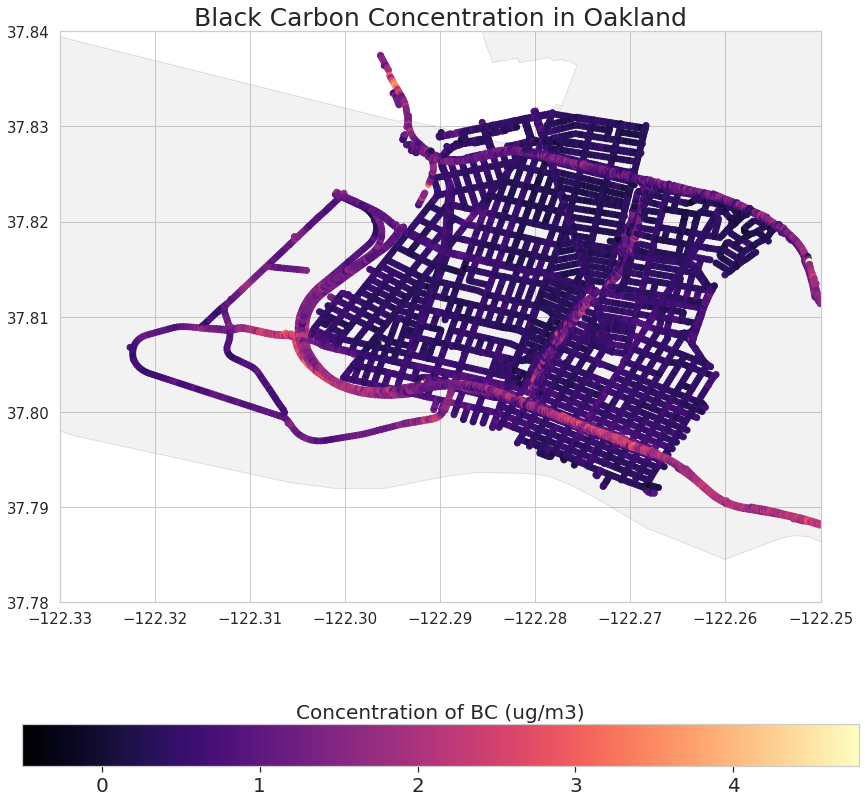

In [30]:
#Create Figure Axis and Set figure size
fig, ax = plt.subplots(figsize = (15,15))

#Minimum and Maximum value of black carbon concentration for legend
vmin = geo_df_BC_Oakland['BC Value'].min()           
vmax = geo_df_BC_Oakland['BC Value'].max()        

# Basemap of City of Oakland from the Oakland shapefile
oakl.plot(ax=ax, color='grey', alpha = 0.1, edgecolor='black')            

#Plot BC value on a map
geo_df_BC_Oakland.plot(ax = ax, column = 'BC Value', legend=False,  cmap = 'magma')
sm = cm.ScalarMappable(cmap='magma', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])


#Set the label size and size of ticks in the color bar
cbar = ax.get_figure().colorbar(sm, ax=ax, orientation='horizontal')
cbar.ax.tick_params(labelsize=20)
cbar.ax.set_title('Concentration of BC (ug/m3)', size = 20)



plt.title("Black Carbon Concentration in Oakland", size = 25)
plt.ylim([37.78, 37.84])
plt.xlim([-122.33,-122.250])




#Set Legend Style
params = {'legend.fontsize': 15,
          'legend.handlelength': 2}
plot.rcParams.update(params)

#leg = ax.get_legend()
# leg.set_bbox_to_anchor((0., 0., 1, 1))
# leg.set_title('Facility Categories', prop={'size':20})
ax.tick_params(labelsize=15) 
plt.show()




## <b> <font size = 4> Plotting NO2 Monitoring Dataset in Oakland </font> </b>

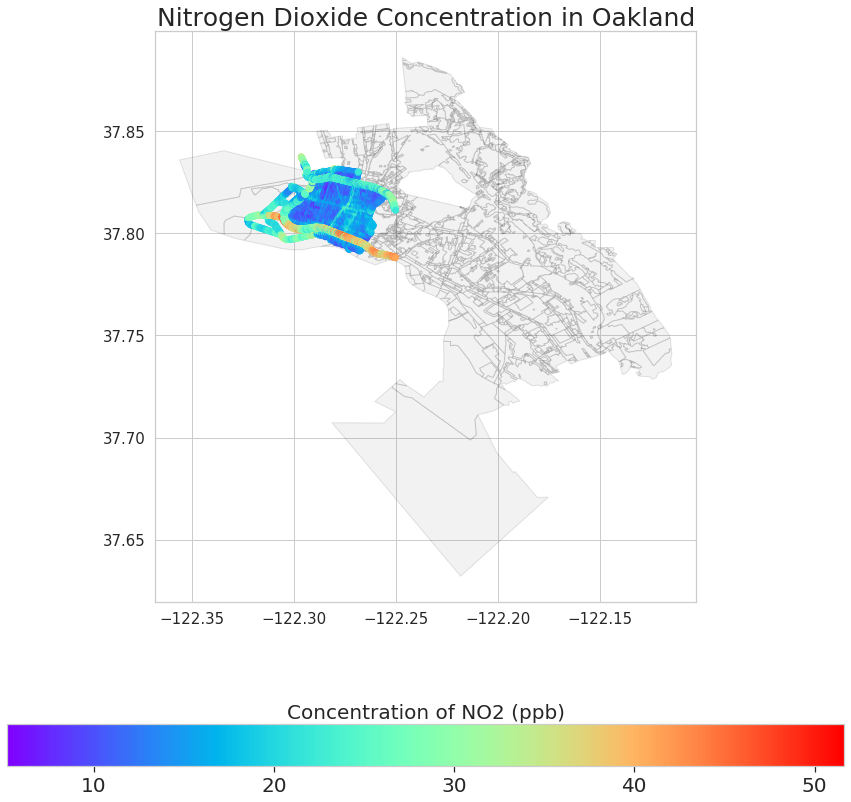

In [30]:
#Create Figure Axis and Set figure size
fig, ax = plt.subplots(figsize = (15,15))

#Minimum and Maximum value of black carbon concentration for legend
vmin = geo_df_NO2_Oakland['NO2 Value'].min()           
vmax = geo_df_NO2_Oakland['NO2 Value'].max()        

# Basemap of City of Oakland from the Oakland shapefile
oakl.plot(ax=ax, color='grey', alpha = 0.1, edgecolor='black')            

#Plot NO2 value on a map
geo_df_NO2_Oakland.plot(ax = ax, column = 'NO2 Value', legend=False, cmap = 'rainbow')
sm = cm.ScalarMappable(cmap='rainbow', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])



#Set the label size and size of ticks in the color bar
cbar = ax.get_figure().colorbar(sm, ax=ax, orientation='horizontal')
cbar.ax.tick_params(labelsize=20)
cbar.ax.set_title('Concentration of NO2 (ppb)', size = 20)



plt.title("Nitrogen Dioxide Concentration in Oakland", size = 25)
#plt.ylim([37.78, 37.84])
#plt.xlim([-122.33,-122.250])

#Set Legend Style
params = {'legend.fontsize': 15,
          'legend.handlelength': 2}
plot.rcParams.update(params)

# leg = ax.get_legend()
# leg.set_bbox_to_anchor((0., 0., 1, 1))
# leg.set_title('Facility Categories', prop={'size':20})
ax.tick_params(labelsize=15) 
plt.show()




## <b> <font size = 4> Plotting BC Dataset and feature importance - facilities with high emissions </font> </b>

**Create a figure with point size as legend**

In [342]:
scheme = mc.NaturalBreaks(BC_feature_importance_filter['mean']*8/min(BC_feature_importance_filter['mean']), k=5)

Text(0.5, 1.0, 'Feature Importance')

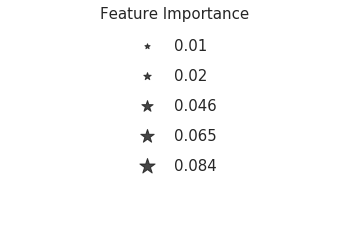

In [344]:
# Here we create a legend:
# we'll plot empty lists with the desired size and label
for area in scheme.bins:
    plt.scatter([], [], c ='k', alpha=0.8, s=area,
                label=str(round(area*min(BC_feature_importance_filter['mean'])/8,3)), marker = '*')
fig = plt.legend(scatterpoints=1, frameon=False, labelspacing=1, loc='upper center')
plt.axis('off')
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.title('Feature Importance', size = 15)


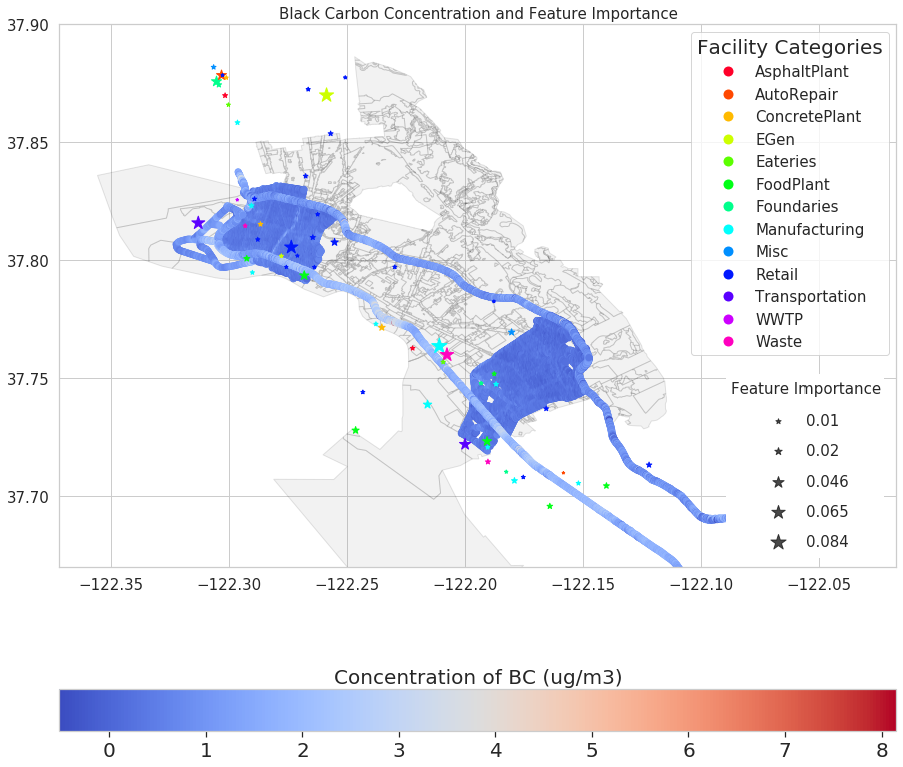

In [345]:
#Create Figure Axis and Set figure size
fig, ax = plt.subplots(figsize = (15,15))

#Minimum and Maximum value of black carbon concentration for legend
vmin = geo_df_BC['BC Value'].min()           
vmax = geo_df_BC['BC Value'].max()        

# Basemap of City of Oakland from the Oakland shapefile
oakl.plot(ax=ax, color='grey', alpha = 0.1, edgecolor='black')            

#Plot BC value on a map
geo_df_BC.plot(ax = ax, column = 'BC Value', legend=False, cmap = 'coolwarm')
sm = cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])

#Set the label size and size of ticks in the color bar
cbar = ax.get_figure().colorbar(sm, ax=ax, orientation='horizontal')
cbar.ax.tick_params(labelsize=20)
cbar.ax.set_title('Concentration of BC (ug/m3)', size = 20)



#Plot the feature importance data
geo_df_BC_facility.plot(ax=ax, cmap='gist_rainbow', column = 'grouping', legend = True, marker='*', markersize = BC_feature_importance_filter['mean']*8/min(BC_feature_importance_filter['mean']))


#ax.get_figure().colorbar(sm, ax=ax, orientation='horizontal', label = 'Concentration of BC (ug/m3)')

plt.title("Black Carbon Concentration and Feature Importance", size = 15)
plt.ylim([37.67, 37.9])






#Set Legend Style
params = {'legend.fontsize': 15,
          'legend.handlelength': 2}
plot.rcParams.update(params)

leg = ax.get_legend()
leg.set_bbox_to_anchor((0., 0., 1, 1))
leg.set_title('Facility Categories', prop={'size':20})
ax.tick_params(labelsize=15) 




# Place the image in the upper-right corner of the figure
#--------------------------------------------------------
# We're specifying the position and size in _figure_ coordinates, so the image
# will shrink/grow as the figure is resized. Remove "zorder=-1" to place the
# image in front of the axes.

im = plt.imread('BC-feature-imp-high.png')
newax = fig.add_axes([0.73, 0.36, 0.17, 0.17], anchor='S')
newax.axes.get_xaxis().set_visible(False)
newax.axes.get_yaxis().set_visible(False)
newax.imshow(im)
newax.axis('off')




plt.show()




## <b> <font size = 4> Plotting NO2 Dataset and feature importance - facilities with high emissions </font> </b>

**Create a figure with point size as legend**

In [346]:
scheme = mc.NaturalBreaks(NO2_feature_importance_filter['mean']*7/min(NO2_feature_importance_filter['mean']), k=5)

Text(0.5, 1.0, 'Feature Importance')

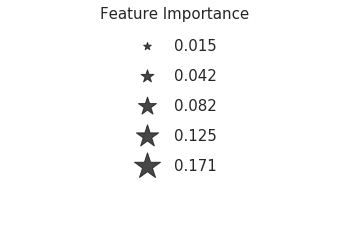

In [347]:
# Here we create a legend:
# we'll plot empty lists with the desired size and label
for area in scheme.bins:
    plt.scatter([], [], c ='k', alpha=0.8, s=area,
                label=str(round(area*min(NO2_feature_importance_filter['mean'])/7,3)), marker = '*')
fig = plt.legend(scatterpoints=1, frameon=False, labelspacing=1, loc='upper center')
plt.axis('off')
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.title('Feature Importance', size = 15)


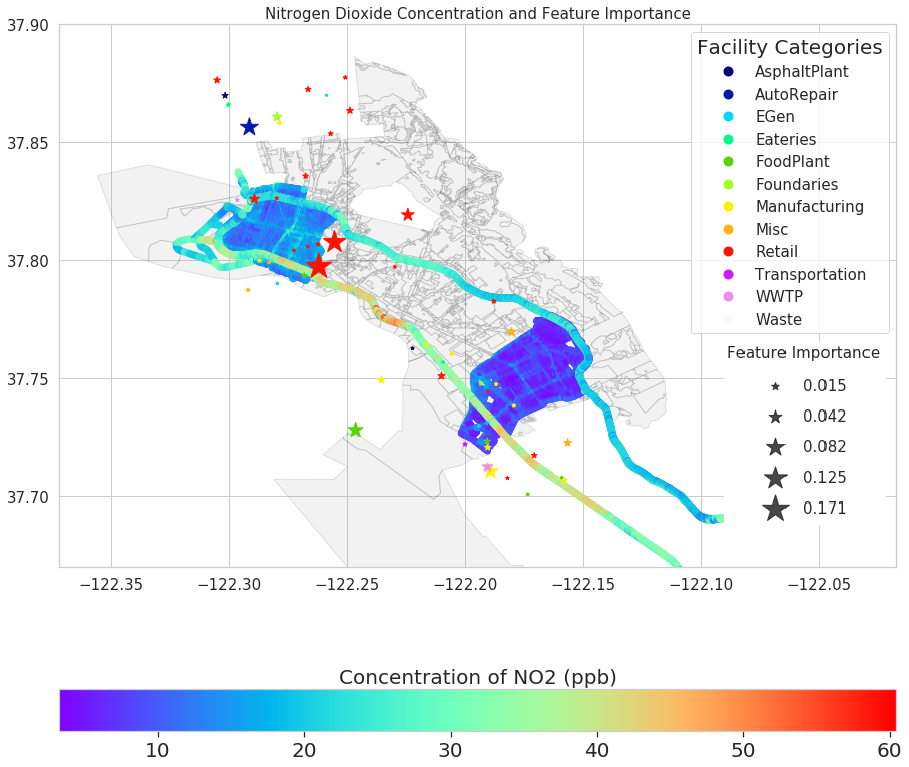

In [348]:

#Create Figure Axis and Set figure size
fig, ax = plt.subplots(figsize = (15,15))

#Minimum and Maximum value of black carbon concentration for legend
vmin = geo_df_NO2['NO2 Value'].min()           
vmax = geo_df_NO2['NO2 Value'].max()        

# Basemap of City of Oakland from the Oakland shapefile
oakl.plot(ax=ax, color='grey', alpha = 0.1, edgecolor='black')            

#Plot BC value on a map
geo_df_NO2.plot(ax = ax, column = 'NO2 Value', legend=False, cmap = 'rainbow')
sm = cm.ScalarMappable(cmap='rainbow', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])


#Set the label size and size of ticks in the color bar
cbar = ax.get_figure().colorbar(sm, ax=ax, orientation='horizontal')
cbar.ax.tick_params(labelsize=20)
cbar.ax.set_title('Concentration of NO2 (ppb)', size = 20)


#Plot the feature importance data
geo_df_NO2_facility.plot(ax=ax, cmap='gist_ncar', column = 'grouping', legend = True, marker='*', 
                         markersize = NO2_feature_importance_filter['mean']*7/min(NO2_feature_importance_filter['mean']))




plt.title("Nitrogen Dioxide Concentration and Feature Importance", size = 15)
plt.ylim([37.67, 37.9])


#Set Legend Style
params = {'legend.fontsize': 15,
          'legend.handlelength': 2}
plot.rcParams.update(params)



leg = ax.get_legend()
#leg.set_bbox_to_anchor((0., 0., 1, 1))
leg.set_bbox_to_anchor((1,1))
leg.set_title('Facility Categories', prop={'size':20})
ax.tick_params(labelsize=15) 





# gplt.pointplot(geo_df_NO2_facility, ax = ax ,scale = NO2_feature_importance_filter['mean'], limits = (1,15), 
#                  legend = True, legend_var = 'scale', 
#                  hue = NO2_feature_importance_filter['mean']*7/min(NO2_feature_importance_filter['mean']), 
#                  scheme=scheme, legend_kwargs={'bbox_to_anchor': (1, 0), 'frameon': False},
#                   legend_values=[0.00303983, 0.00538608, 0.01217797, 0.17102206],
#                   legend_labels=['0.003', '0.005', '0.012', '0.171'])




# Place the image in the upper-right corner of the figure
#--------------------------------------------------------
# We're specifying the position and size in _figure_ coordinates, so the image
# will shrink/grow as the figure is resized. Remove "zorder=-1" to place the
# image in front of the axes.

im = plt.imread('NO2-feature-imp-high.png')
newax = fig.add_axes([0.73, 0.39, 0.17, 0.17], anchor='S')
newax.axes.get_xaxis().set_visible(False)
newax.axes.get_yaxis().set_visible(False)
newax.imshow(im)
newax.axis('off')










plt.show()



## <b> <font size = 4> Plotting BC Dataset and feature importance - all facilities </font> </b>

**Create a figure with point size as legend**



In [ ]:
scheme = mc.NaturalBreaks(BC_feature_importance_all_filter['mean']*2/min(BC_feature_importance_all_filter['mean']), k=5)

Text(0.5, 1.0, 'Feature Importance')

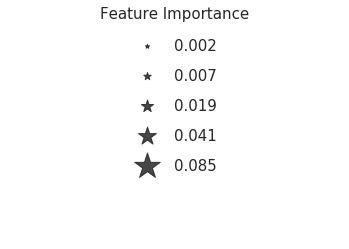

In [350]:
# Here we create a legend:
# we'll plot empty lists with the desired size and label
for area in scheme.bins:
    plt.scatter([], [], c ='k', alpha=0.8, s=area,
                label=str(round(area*min(BC_feature_importance_all_filter['mean'])/2,3)), marker = '*')
fig = plt.legend(scatterpoints=1, frameon=False, labelspacing=1, loc='upper center')
plt.axis('off')
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.title('Feature Importance', size = 15)


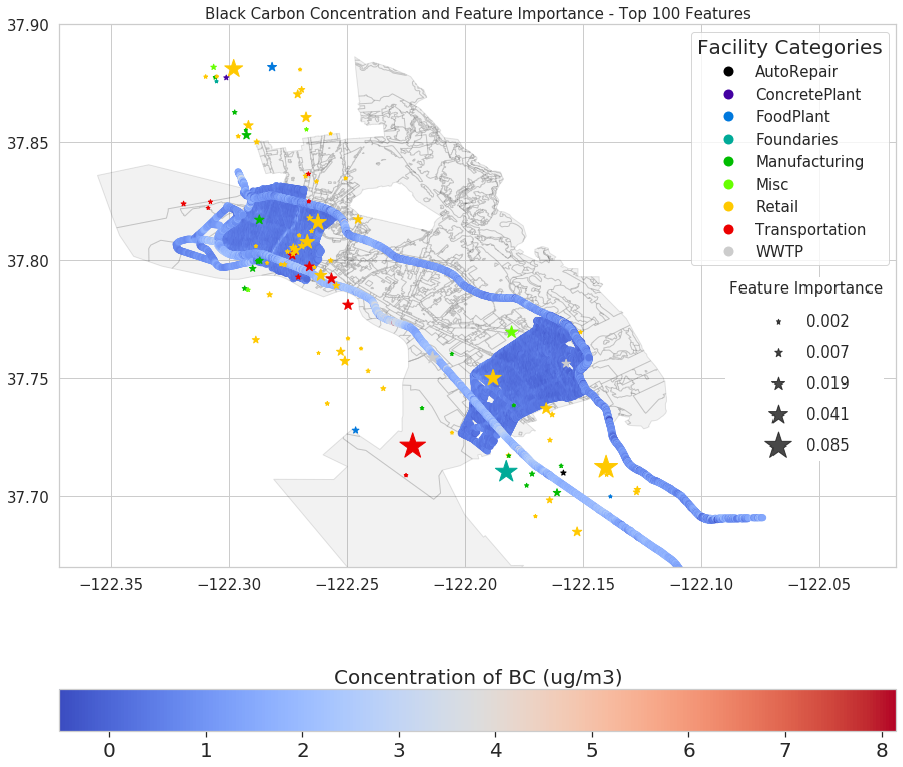

In [358]:
#Create Figure Axis and Set figure size
fig, ax = plt.subplots(figsize = (15,15))

#Minimum and Maximum value of black carbon concentration for legend
vmin = geo_df_BC['BC Value'].min()           
vmax = geo_df_BC['BC Value'].max()        

# Basemap of City of Oakland from the Oakland shapefile
oakl.plot(ax=ax, color='grey', alpha = 0.1, edgecolor='black')            

#Plot BC value on a map
geo_df_BC.plot(ax = ax, column = 'BC Value', legend=False, cmap = 'coolwarm')
sm = cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])

#Set the label size and size of ticks in the color bar
cbar = ax.get_figure().colorbar(sm, ax=ax, orientation='horizontal')
cbar.ax.tick_params(labelsize=20)
cbar.ax.set_title('Concentration of BC (ug/m3)', size = 20)



#Plot the feature importance data
geo_df_BC_facility_all[0:100].plot(ax=ax, cmap='nipy_spectral', column = 'grouping', legend = True, marker='*', 
                                   markersize = BC_feature_importance_all_filter['mean']*2/min(BC_feature_importance_all_filter['mean']))


#ax.get_figure().colorbar(sm, ax=ax, orientation='horizontal', label = 'Concentration of BC (ug/m3)')

plt.title("Black Carbon Concentration and Feature Importance - Top 100 Features", size = 15)
plt.ylim([37.67, 37.9])


#Set Legend Style
params = {'legend.fontsize': 15,
          'legend.handlelength': 2}
plot.rcParams.update(params)

leg = ax.get_legend()
leg.set_bbox_to_anchor((0., 0., 1, 1))
leg.set_title('Facility Categories', prop={'size':20})
ax.tick_params(labelsize=15) 






# Place the image in the upper-right corner of the figure
#--------------------------------------------------------
# We're specifying the position and size in _figure_ coordinates, so the image
# will shrink/grow as the figure is resized. Remove "zorder=-1" to place the
# image in front of the axes.

im = plt.imread('BC-feature-imp-all.png')
newax = fig.add_axes([0.73, 0.45, 0.17, 0.17], anchor='S')
newax.axes.get_xaxis().set_visible(False)
newax.axes.get_yaxis().set_visible(False)
newax.imshow(im)
newax.axis('off')















plt.show()




## <b> <font size = 4> Plotting NO2 Dataset and feature importance - all facilities </font> </b>

**Create a figure with point size as legend**


In [366]:
scheme = mc.NaturalBreaks(NO2_feature_importance_all_filter['mean']*1/min(NO2_feature_importance_all_filter['mean']), k=5)

Text(0.5, 1.0, 'Feature Importance')

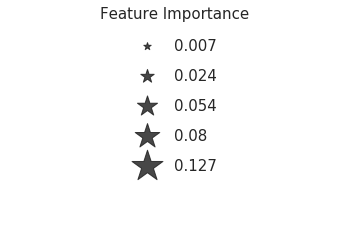

In [368]:
# Here we create a legend:
# we'll plot empty lists with the desired size and label
for area in scheme.bins:
    plt.scatter([], [], c ='k', alpha=0.8, s=area,
                label=str(round(area*min(NO2_feature_importance_all_filter['mean'])/1,3)), marker = '*')
fig = plt.legend(scatterpoints=1, frameon=False, labelspacing=1, loc='upper center')
plt.axis('off')
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.title('Feature Importance', size = 15)


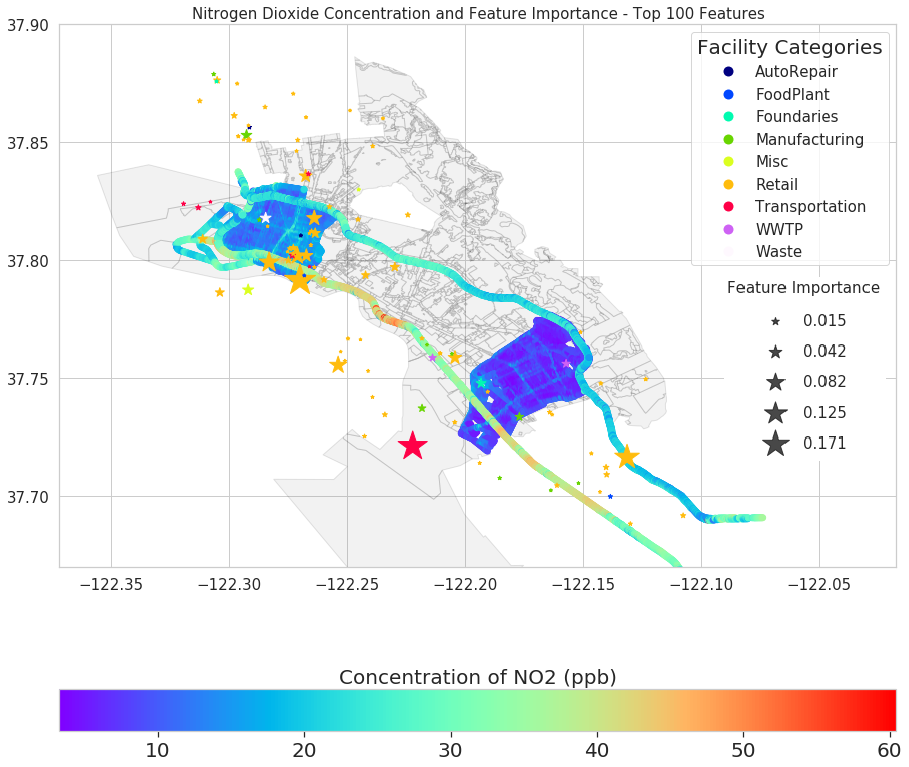

In [376]:
#Create Figure Axis and Set figure size
fig, ax = plt.subplots(figsize = (15,15))

#Minimum and Maximum value of black carbon concentration for legend
vmin = geo_df_NO2['NO2 Value'].min()           
vmax = geo_df_NO2['NO2 Value'].max()        

# Basemap of City of Oakland from the Oakland shapefile
oakl.plot(ax=ax, color='grey', alpha = 0.1, edgecolor='black')            

#Plot BC value on a map
geo_df_NO2.plot(ax = ax, column = 'NO2 Value', legend=False, cmap = 'rainbow')
sm = cm.ScalarMappable(cmap='rainbow', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])


#Set the label size and size of ticks in the color bar
cbar = ax.get_figure().colorbar(sm, ax=ax, orientation='horizontal')
cbar.ax.tick_params(labelsize=20)
cbar.ax.set_title('Concentration of NO2 (ppb)', size = 20)


#Plot the feature importance data
geo_df_NO2_facility_all[0:100].plot(ax=ax, cmap='gist_ncar', column = 'grouping', legend = True, marker='*', markersize = NO2_feature_importance_all_filter['mean']*1/min(NO2_feature_importance_all_filter['mean']))


#ax.get_figure().colorbar(sm, ax=ax, orientation='horizontal', label = 'Concentration of NO2 (ug/m3)')

plt.title("Nitrogen Dioxide Concentration and Feature Importance - Top 100 Features", size = 15)
plt.ylim([37.67, 37.9])


#Set Legend Style
params = {'legend.fontsize': 15,
          'legend.handlelength': 2}
plot.rcParams.update(params)

leg = ax.get_legend()
leg.set_bbox_to_anchor((0., 0., 1, 1))
leg.set_title('Facility Categories', prop={'size':20})
ax.tick_params(labelsize=15) 





# Place the image in the upper-right corner of the figure
#--------------------------------------------------------
# We're specifying the position and size in _figure_ coordinates, so the image
# will shrink/grow as the figure is resized. Remove "zorder=-1" to place the
# image in front of the axes.

im = plt.imread('NO2-feature-imp-high.png')
newax = fig.add_axes([0.73, 0.45, 0.17, 0.17], anchor='S')
newax.axes.get_xaxis().set_visible(False)
newax.axes.get_yaxis().set_visible(False)
newax.imshow(im)
newax.axis('off')












plt.show()




## <b> <font size = 4> Plotting predicted BC concentrations + measured BC concentrations </font> </b>

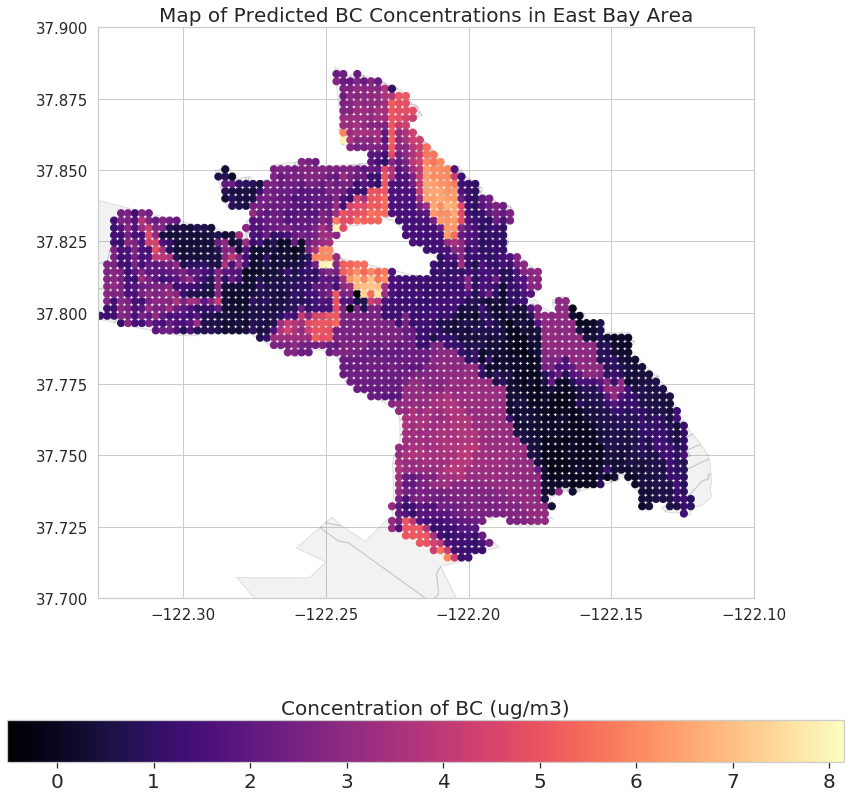

In [63]:
#Create Figure Axis and Set figure size
fig, ax = plt.subplots(figsize = (15,15))

#Minimum and Maximum value of black carbon concentration for legend
vmin = geo_df_BC['BC Value'].min()           
vmax = geo_df_BC['BC Value'].max()        

# Basemap of City of Oakland from the Oakland shapefile
oakl.plot(ax=ax, color='grey', alpha = 0.1, edgecolor='black')            

#Plot BC value on a map
#geo_df_BC.plot(ax = ax, column = 'BC Value', legend=False,  cmap = 'magma')
geo_df_grid_predicted_BC.plot(ax = ax, column = 'BC_Predicted_XGB', legend=False,  cmap = 'magma', markersize = 50)
sm = cm.ScalarMappable(cmap='magma', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])


#Set the label size and size of ticks in the color bar
cbar = ax.get_figure().colorbar(sm, ax=ax, orientation='horizontal')
cbar.ax.tick_params(labelsize=20)
cbar.ax.set_title('Concentration of BC (ug/m3)', size = 20)

plt.ylim([37.70, 37.90])
plt.xlim([-122.33,-122.10])

plt.title("Map of Predicted BC Concentrations in East Bay Area", size = 20)





#Set Legend Style
params = {'legend.fontsize': 15,
          'legend.handlelength': 2}
plot.rcParams.update(params)

#leg = ax.get_legend()
# leg.set_bbox_to_anchor((0., 0., 1, 1))
# leg.set_title('Facility Categories', prop={'size':20})
ax.tick_params(labelsize=15) 
plt.show()




## <b> <font size = 4> Plotting predicted NO2 concentrations + measured NO2 concentrations </font> </b>

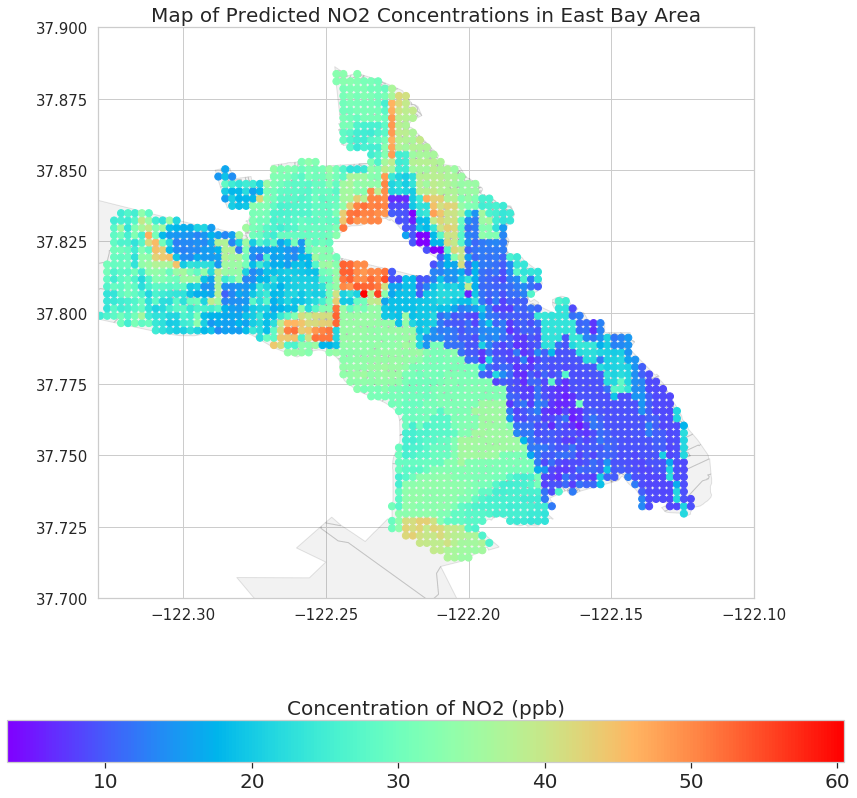

In [62]:
#Create Figure Axis and Set figure size
fig, ax = plt.subplots(figsize = (15,15))

#Minimum and Maximum value of black carbon concentration for legend
vmin = geo_df_NO2['NO2 Value'].min()           
vmax = geo_df_NO2['NO2 Value'].max()        

# Basemap of City of Oakland from the Oakland shapefile
oakl.plot(ax=ax, color='grey', alpha = 0.1, edgecolor='black')            

#Plot NO2 value on a map
#geo_df_NO2.plot(ax = ax, column = 'NO2 Value', legend=False, cmap = 'rainbow', markersize  = 50)
geo_df_grid_predicted_NO2.plot(ax = ax, column = 'NO2_Predicted_XGB', legend=False,  cmap = 'rainbow', markersize = 50)
sm = cm.ScalarMappable(cmap='rainbow', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])



#Set the label size and size of ticks in the color bar
cbar = ax.get_figure().colorbar(sm, ax=ax, orientation='horizontal')
cbar.ax.tick_params(labelsize=20)
cbar.ax.set_title('Concentration of NO2 (ppb)', size = 20)

plt.ylim([37.70, 37.90])
plt.xlim([-122.33,-122.10])

plt.title("Map of Predicted NO2 Concentrations in East Bay Area", size = 20)

#Set Legend Style
params = {'legend.fontsize': 15,
          'legend.handlelength': 2}
plot.rcParams.update(params)

# leg = ax.get_legend()
# leg.set_bbox_to_anchor((0., 0., 1, 1))
# leg.set_title('Facility Categories', prop={'size':20})
ax.tick_params(labelsize=15) 
plt.show()




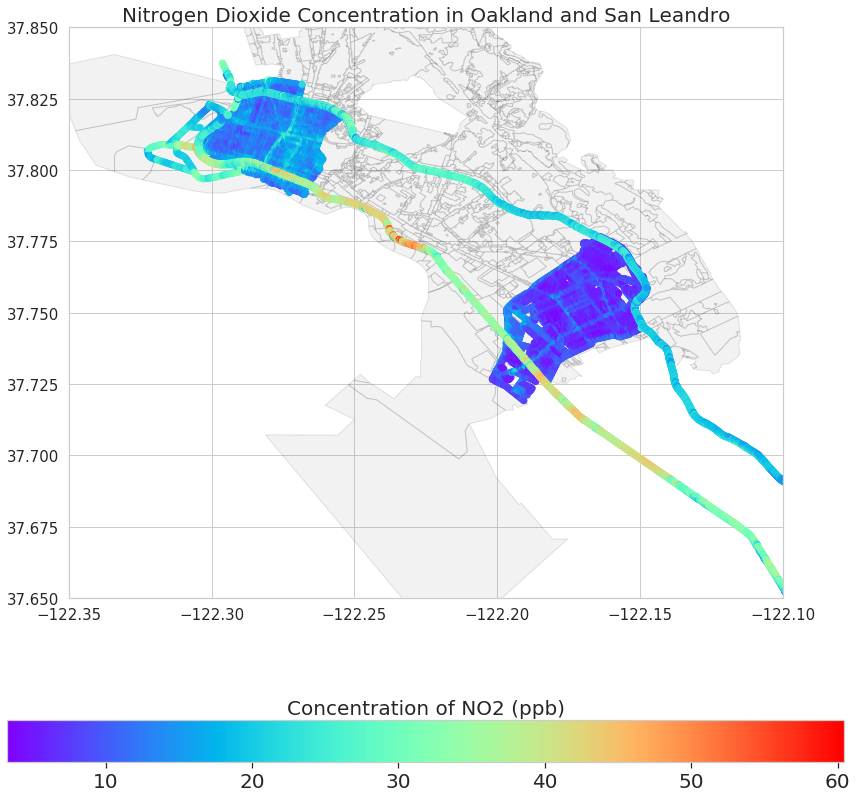

In [37]:
#Create Figure Axis and Set figure size
fig, ax = plt.subplots(figsize = (15,15))

#Minimum and Maximum value of black carbon concentration for legend
vmin = geo_df_NO2['NO2 Value'].min()           
vmax = geo_df_NO2['NO2 Value'].max()        

# Basemap of City of Oakland from the Oakland shapefile
oakl.plot(ax=ax, color='grey', alpha = 0.1, edgecolor='black')            

#Plot NO2 value on a map
geo_df_NO2.plot(ax = ax, column = 'NO2 Value', legend=False, cmap = 'rainbow')
sm = cm.ScalarMappable(cmap='rainbow', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])



#Set the label size and size of ticks in the color bar
cbar = ax.get_figure().colorbar(sm, ax=ax, orientation='horizontal')
cbar.ax.tick_params(labelsize=20)
cbar.ax.set_title('Concentration of NO2 (ppb)', size = 20)



plt.title("Nitrogen Dioxide Concentration in Oakland and San Leandro", size = 20)
plt.ylim([37.65, 37.85])
plt.xlim([-122.35,-122.1])

#Set Legend Style
params = {'legend.fontsize': 15,
          'legend.handlelength': 2}
plot.rcParams.update(params)

# leg = ax.get_legend()
# leg.set_bbox_to_anchor((0., 0., 1, 1))
# leg.set_title('Facility Categories', prop={'size':20})
ax.tick_params(labelsize=15) 
plt.show()




In [ ]:
References: 
    https://residentmario.github.io/geoplot/user_guide/Customizing_Plots.html